In [1]:
import os

os.chdir("../../test_data/system_tests/sensitivity_tests/Spectronaut_SmallFC")



In [2]:

samplemap_file = "samples.map.tsv"
results_dir = "results"
input_file = "20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip"
results_dir_nonorm = "results_no_ml_no_norm"
results_dir_housekeeping_norm = "results_housekeeping_norm"
run_diffanalysis = False
run_diffanalysis_housekeeping_norm = False
housekeeping_proteins = "housekeeping_proteins.tsv"



In [3]:
if run_diffanalysis:
    import alphaquant.diff_analysis_manager as diffmgr
    diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, runtime_plots=True, results_dir=results_dir)

In [4]:
if run_diffanalysis_housekeeping_norm:
    import alphaquant.run_pipeline as diffmgr
    diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, runtime_plots=True, results_dir=results_dir_housekeeping_norm, 
                         protein_subset_for_normalization_file=housekeeping_proteins, input_type_to_use="spectronaut_fragion_isotopes_protein", annotation_columns=["PG.Organisms"])

In [4]:
import pandas as pd
alphaquant_file = f"{results_dir_housekeeping_norm}/S1_VS_S2.results.tsv"
spectronaut_file = f"MP-SFC-OT.xlsx"

df_alphaquant = pd.read_csv(alphaquant_file, sep='\t')[["protein", "log2fc", "fdr", "quality_score", "PG.Organisms", "total_intensity"]].rename(columns={"PG.Organisms": "organism"})
display(df_alphaquant)

df_spectronaut = pd.read_excel(spectronaut_file, sheet_name=2)[["Protein", "log2FC", "adjusted.pvalue"]].rename(columns={"Protein" : "protein", "log2FC" : "log2fc", "adjusted.pvalue" : "fdr"})

df_combined = df_alphaquant.merge(df_spectronaut, on="protein", how="inner", suffixes=("_alphaquant", "_spectronaut"))
df_combined["intensity_alphaquant"] = df_combined["total_intensity"]
df_combined["intensity_spectronaut"] = df_combined["total_intensity"]
df_combined = df_combined.drop(columns=["total_intensity"])
display(df_combined)

df_spectronaut = df_spectronaut.merge(df_alphaquant[["protein", "organism"]], on="protein", how="inner")


,protein,log2fc,fdr,quality_score,organism,total_intensity
0,Q9N5A0,-0.196019,6.041969e-01,0.007424,Caenorhabditis elegans,6.407812e+07
1,P0A884,0.413401,6.111854e-05,0.030279,Escherichia coli (strain K12),6.207494e+07
2,P26640,-0.003631,8.914874e-01,0.167099,Homo sapiens,2.494525e+08
3,P54115,-0.199445,1.489758e-10,0.190958,Saccharomyces cerevisiae (strain ATCC 204508 /...,1.045062e+09
4,Q17426,-0.158391,6.661060e-01,0.009164,Caenorhabditis elegans,8.750048e+06
...,...,...,...,...,...,...
11357,P64429,0.865510,7.978389e-02,0.001237,Escherichia coli (strain K12),1.312264e+06
11358,P32162,0.120225,7.313515e-01,0.001959,Escherichia coli (strain K12),8.583429e+05
11359,Q20447,-0.009518,9.892722e-01,0.000773,Caenorhabditis elegans,1.672125e+04
11360,P40492,0.105512,9.862325e-01,0.000928,Saccharomyces cerevisiae (strain ATCC 204508 /...,6.041425e+04


,protein,log2fc_alphaquant,fdr_alphaquant,quality_score,organism,log2fc_spectronaut,fdr_spectronaut,intensity_alphaquant,intensity_spectronaut
0,Q9N5A0,-0.196019,6.041969e-01,0.007424,Caenorhabditis elegans,-0.168998,0.710910,6.407812e+07,6.407812e+07
1,P0A884,0.413401,6.111854e-05,0.030279,Escherichia coli (strain K12),0.592465,0.133081,6.207494e+07,6.207494e+07
2,P26640,-0.003631,8.914874e-01,0.167099,Homo sapiens,0.023523,0.701856,2.494525e+08,2.494525e+08
3,P54115,-0.199445,1.489758e-10,0.190958,Saccharomyces cerevisiae (strain ATCC 204508 /...,-0.231802,0.553651,1.045062e+09,1.045062e+09
4,Q17426,-0.158391,6.661060e-01,0.009164,Caenorhabditis elegans,-0.273628,0.171376,8.750048e+06,8.750048e+06
...,...,...,...,...,...,...,...,...,...
8724,P53507,-0.171127,7.140229e-01,0.002753,Saccharomyces cerevisiae (strain ATCC 204508 /...,-0.216110,0.614608,3.154265e+06,3.154265e+06
8725,O95342,0.151721,6.748614e-01,0.002784,Homo sapiens,0.209606,0.605426,5.208662e+06,5.208662e+06
8726,Q9NSB4,0.012419,9.633361e-01,0.005568,Homo sapiens,-0.019455,0.808175,1.519702e+08,1.519702e+08
8727,Q8TEY7;Q8TEY7-2;Q8TEY7-3,0.253432,5.559904e-01,0.002475,Homo sapiens,0.215828,0.554438,3.375725e+06,3.375725e+06


,organism,hits_alphaquant,max_hits_alphaquant,allowed_decoy_hits_alphaquant,hits_spectronaut,max_hits_spectronaut,allowed_decoy_hits_spectronaut
0,Caenorhabditis elegans,407,2388,NaN,1.0,2388,NaN
1,Escherichia coli (strain K12),966,1133,NaN,6.0,1133,NaN
2,Homo sapiens,77,0,105.0,NaN,0,0.0
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,562,1328,NaN,NaN,1328,NaN


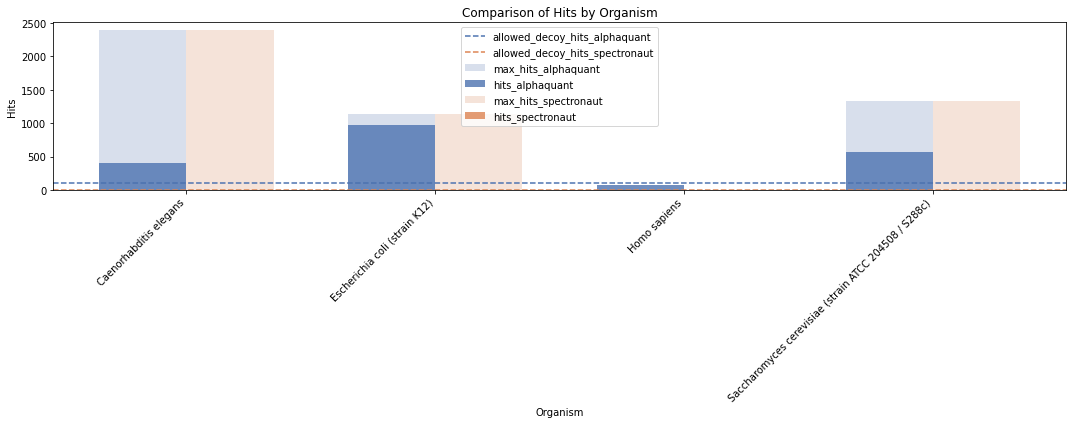

In [6]:
import alphaquant.benchm.sensitivity as aq_benchm_sensititivy
classification_benchmark = aq_benchm_sensititivy.RatioClassificationTableGenerator(df_combined, decoy_organism="Homo sapiens")
classification_df = classification_benchmark.per_species_results_df
display(classification_df)
ax = aq_benchm_sensititivy.plot_sighits_barplot(classification_benchmark.per_species_results_df, ['_alphaquant', '_spectronaut'], 'Homo sapiens')



In [20]:
import alphaquant.benchm.sensitivity as aq_benchm_sensititivy


print()
print(aq_benchm_sensititivy.get_tp_fp_from_count_df(classification_df, organism_fp="Homo sapiens", suffix="_spectronaut"))


(1935, 77)
(7.0, 0.0)


In [7]:
%reload_ext autoreload
%autoreload 2

In [8]:
display(df_spectronaut.sort_values(by = 'fdr'))

,protein,log2fc,fdr,organism
3325,P34647,1.125749,0.028238,Caenorhabditis elegans
2512,P16456,0.479439,0.028238,Escherichia coli (strain K12)
2105,P0AEC3,0.570801,0.028238,Escherichia coli (strain K12)
4606,P64451,0.747197,0.028238,Escherichia coli (strain K12)
4713,P76561,0.660792,0.028238,Escherichia coli (strain K12)
...,...,...,...,...
5138,Q07688,-0.000605,0.822894,Saccharomyces cerevisiae (strain ATCC 204508 /...
4774,P82933,-0.000132,0.822894,Homo sapiens
4669,P75829,-0.000872,0.822894,Escherichia coli (strain K12)
7584,Q9BVQ7,-0.000090,0.822979,Homo sapiens


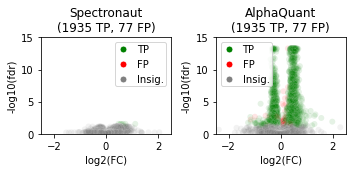

In [24]:
import matplotlib.pyplot as plt
import alphaquant.plotting.pairwise as aq_plot_pairwise
from matplotlib.lines import Line2D

organism2color = {'Homo sapiens' : 'red', 'Escherichia coli (strain K12)' : 'green',
       'Caenorhabditis elegans' : 'green',
       'Saccharomyces cerevisiae (strain ATCC 204508 / S288c)' : 'green'}

fig, axes = plt.subplots(1, 2, figsize = (5, 2.5))

aq_plot_pairwise.volcano_plot(df_spectronaut, fdr_cutoff= 0.05, log2fc_cutoff= 0, organism_column='organism',organism2color_dict = organism2color, 
                              color_only_significant=True,  ax= axes[0], ylim=[0, 15], draw_vertical_lines=True)
aq_plot_pairwise.volcano_plot(df_alphaquant, fdr_cutoff= 0.05, log2fc_cutoff= 0, organism_column='organism',organism2color_dict = organism2color, 
                              color_only_significant=True,  ax= axes[1], ylim=[0, 15], draw_vertical_lines=True)

for ax in axes:
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([0, 15])
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='TP', markersize=7, markerfacecolor='green'),
                       Line2D([0], [0], marker='o', color='w', label='FP', markersize=7, markerfacecolor='red'),
                       Line2D([0], [0], marker='o', color='w', label='Insig.', markersize=7, markerfacecolor='gray')]
    ax.legend(handles=legend_elements,  borderpad=0.2, labelspacing=0.5, handlelength=1.2)
    

tp_aq, fp_aq = aq_benchm_sensititivy.get_tp_fp_from_count_df(classification_df, organism_fp="Homo sapiens", suffix="_alphaquant")
tp_sn, fp_sn = aq_benchm_sensititivy.get_tp_fp_from_count_df(classification_df, organism_fp="Homo sapiens", suffix="_spectronaut")




axes[0].set_title(f"Spectronaut\n({tp_aq} TP, {fp_aq} FP)")
axes[1].set_title(f"AlphaQuant\n({tp_aq} TP, {fp_aq} FP)")

fig.tight_layout()
fig.savefig("volcano_plot_smallfc.pdf", dpi=300)

fig.tight_layout()

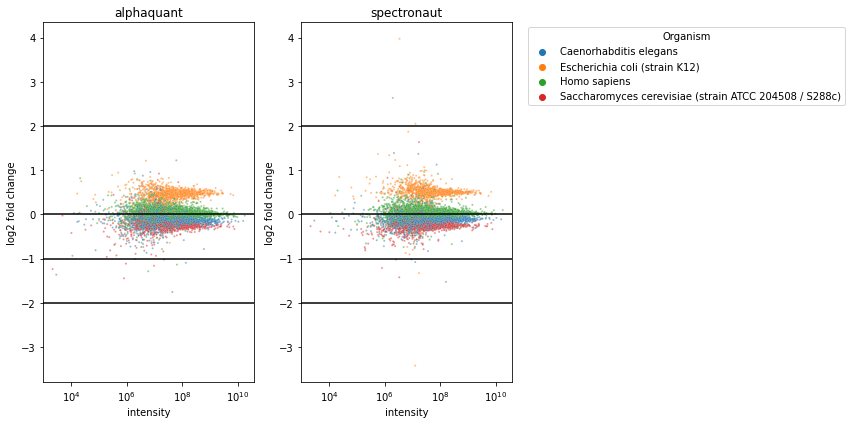

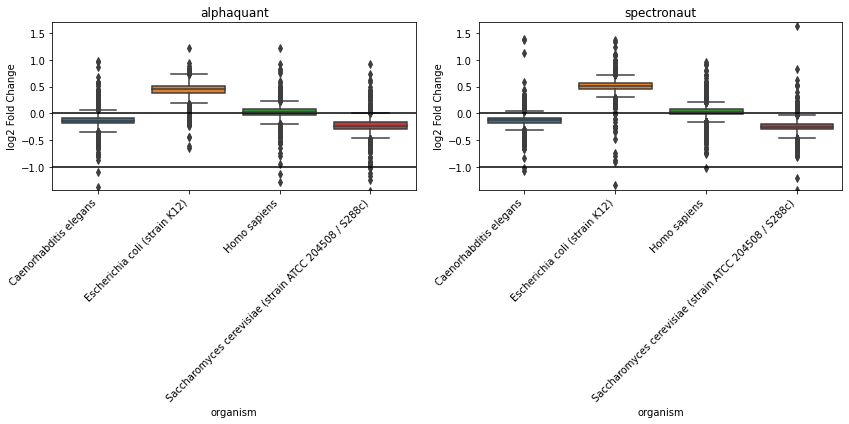

In [5]:
import alphaquant.benchm.ratios as aq_benchm_ratios

scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])



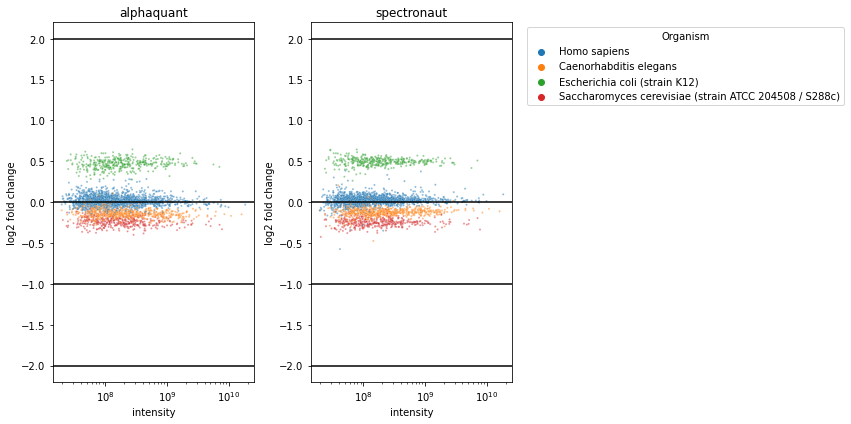

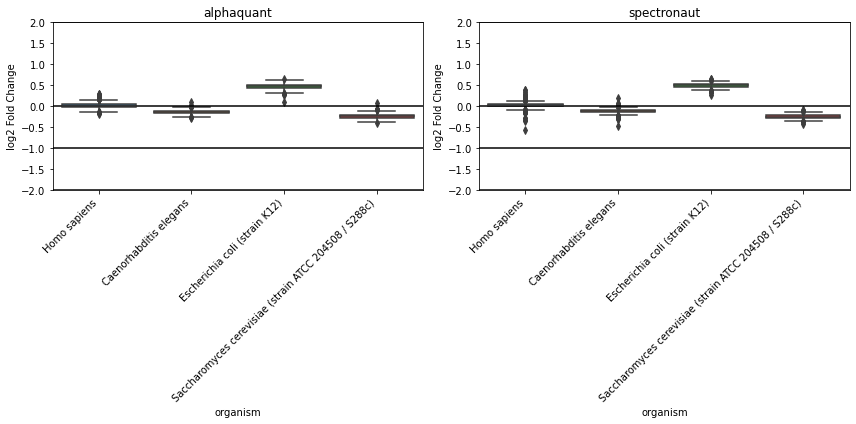

In [6]:
df_combined_shortened = df_combined.sort_values(by= "quality_score", ascending=False).head(3000)


scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=df_combined_shortened, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=df_combined_shortened, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])

